In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# we have a dataset that looks like this

In [5]:
# buchanan
df = pd.read_csv('../results/semcor_analysis_model.plsr.buchanan.allbuthomoyms.1k.300components.500max_iters.csv')

# mcrae
# df = pd.read_csv('results/semcor_analysis_model.plsr.mc_rae_real.5k.100components.500max_iters.csv')
df.head(25)

,Unnamed: 0,word,n,n_senses,pearson,pearson_p,spearman,spearman_p
0,0,same,74,4,NaN,NaN,NaN,NaN
1,1,authorities,2,2,NaN,NaN,NaN,NaN
2,2,release,17,8,0.569209,2.626043e-09,0.635273,7.933999e-12
3,3,seem,38,2,0.216657,6.501135e-09,0.213992,1.002906e-08
4,4,read,34,8,0.500903,5.744607e-37,0.469681,3.986627e-32
5,5,natural,24,3,NaN,NaN,NaN,NaN
6,6,gift,6,3,0.386992,1.541482e-01,0.295804,2.844195e-01
7,7,words,7,4,-0.074671,7.476922e-01,-0.114904,6.199203e-01
8,8,added,56,4,0.689630,7.875774e-218,0.640070,2.902838e-178
9,9,trying,28,2,0.361023,4.437291e-13,0.363899,2.804357e-13


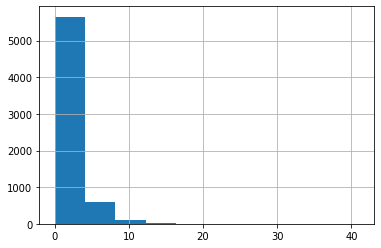

In [6]:
# distribution over number of senses

df["n_senses"].hist();

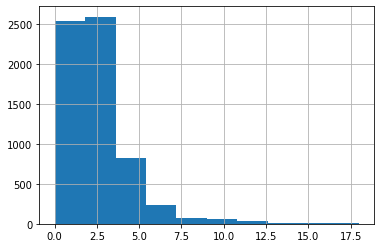

In [7]:
# closer look at lower freqs

df[df.n_senses < 20].n_senses.hist();

In [8]:
# put stats into polysemy bins

df["wn_bin"] = pd.cut(df.n_senses, 
                        bins = [0, 2.1, 5.1, 7.7, 10.1, 20.1, 50.1, 200], labels = False)

In [9]:
# let's define a function to analyze the data

def average_correlation(data):
    data = data[data['pearson'].notnull() ]
    #data = data[data['n'] > 20 ]
    # only use when we have a confidence value in our analysis
    data = data[data['pearson_p'] < 0.05] 
    average = np.average(data['pearson'])
    return average
    #print("Average correlation between wu palmer distance and cosine distance for this model is: ", average)

def analyze_data(data):
    data = data[data['pearson'].notnull() ]
    #data = data[data['n'] > 20 ]
    
    # only use when we have a confidence value in our analysis
    data = data[data['pearson_p'] < 0.05] 
    
    data["wn_bin"] = pd.cut(data.n_senses, 
                        bins = [0, 2.1, 4.1, 6.1, 8.1, 10.1, 20.1, 50.1, 200], labels = False)
    
    ax = sns.violinplot(x=data['pearson'])
    plt.show()
    ax = sns.violinplot(x=data['wn_bin'], y=data['pearson'])
    plt.show()

    data.boxplot(column='pearson', by='wn_bin')
    plt.show()
    
#     plt.scatter(data['n_senses'], data['pearson'])
#     plt.title("Wordnet similarity of homonymous senses plotted against cosine similarity of predicted vectors of two tokens in semantic feature space")
#     plt.xlabel("Number of Senses")
#     plt.ylabel("Cosine Similarity")
#     plt.show()
    
#    print(data)
    
    
    
#analyze_data(df)

In [10]:
other = df[df['pearson'].notnull() ]
other = other[other['pearson_p'] < 0.05 ]
other = other[other['pearson'] < 0.2 ]
other

,Unnamed: 0,word,n,n_senses,pearson,pearson_p,spearman,spearman_p,wn_bin
23,23,include,28,3,0.179728,0.000446,0.152521,0.002950,1.0
24,24,decide,17,2,-0.174368,0.042329,-0.179777,0.036235,0.0
39,39,behavior,36,3,0.091985,0.020937,0.114348,0.004055,1.0
46,46,effort,37,3,0.085182,0.027937,0.093819,0.015436,1.0
48,48,image,30,5,0.126452,0.008281,0.154560,0.001222,1.0
...,...,...,...,...,...,...,...,...,...
5457,5457,attached,14,4,-0.241213,0.026155,-0.265929,0.013897,1.0
5508,5508,pour,4,4,-0.829882,0.040948,-0.898645,0.014889,1.0
5669,5669,shared,26,5,0.137580,0.018067,0.089476,0.125187,1.0
5690,5690,audiences,8,2,-0.404362,0.032824,-0.444161,0.017892,0.0


In [11]:
# We have it for 6 different models.

# BUCHANAN
# models = [
#     'results/semcor_analysis_model.plsr.buchanan.allbuthomoyms.5k.300components.500max_iters.csv',
#     'results/semcor_analysis_model.plsr.buchanan.allbuthomoyms.1k.300components.500max_iters.csv',
#     #'results/semcor_analysis_model.plsr.buchanan.allbuthomoyms.glove.300components.300max_iters.csv',
#     'results/semcor_analysis_model.ffnn.buchanan.allbuthomoyms.5k.50epochs.0.5dropout.lr1e-4.hsize300.csv',
#     'results/semcor_analysis_model.ffnn.buchanan.allbuthomoyms.1k.50epochs.0.5dropout.lr1e-4.hsize300.csv',
#     #'trained_models/semcor_analysis_model.ffnn.buchanan.allbuthomoyms.glove.50epochs.0.5dropout.lr1e-4.hsize300.csv',
#     'results/semcor_analysis_model.modabs.buchanan.allbuthomoyms.5k.csv',
#     'results/semcor_analysis_model.modabs.buchanan.allbuthomoyms.1k.csv',
#     #'trained_models/semcor_analysis_model.modabs.buchanan.allbuthomoyms.glove.csv'
# ]


# MCRAE
models = [
    'results/semcor_analysis_model.plsr.mc_rae_real.1k.50components.500max_iters.csv',
    'results/semcor_analysis_model.plsr.mc_rae_real.5k.100components.500max_iters.csv',
    #'results/semcor_analysis_model.plsr.mc_rae_real.glove.100components.300max_iters.csv',
    'results/semcor_analysis_model.ffnn.mc_rae_real.1k.50epochs.0.5dropout.lr1e-4.hsize300.csv',
    'results/semcor_analysis_model.ffnn.mc_rae_real.5k.50epochs.0.5dropout.lr1e-4.hsize300.csv',
    #'results/semcor_analysis_model.ffnn.mc_rae_real.glove.50epochs.0.5dropout.lr1e-4.hsize300.csv',
    'results/semcor_analysis_model.modabs.mc_rae_real.1k.csv',
    'results/semcor_analysis_model.modabs.mc_rae_real.5k.csv',
    #'results/semcor_analysis_model.modabs.mc_rae_real.glove.csv'
    ]

****************************************
*** Evaluating results/semcor_analysis_model.plsr.mc_rae_real.1k.50components.500max_iters.csv model ***
****************************************


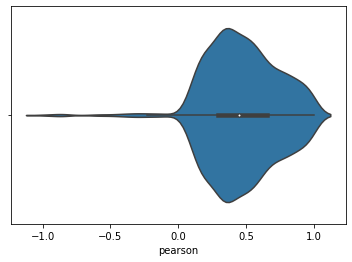

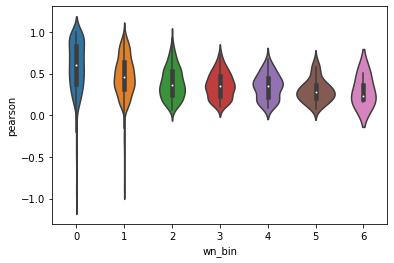

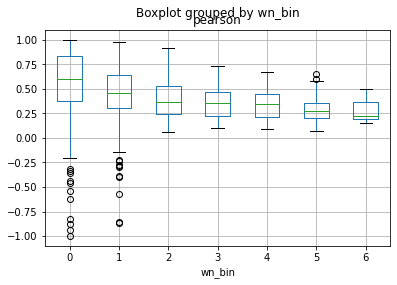


****************************************
*** Evaluating results/semcor_analysis_model.plsr.mc_rae_real.5k.100components.500max_iters.csv model ***
****************************************


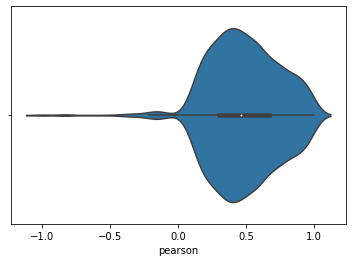

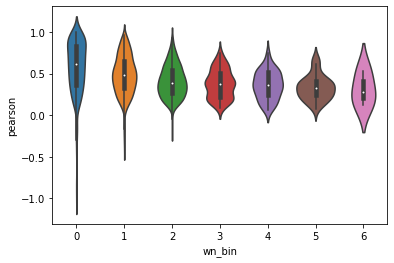

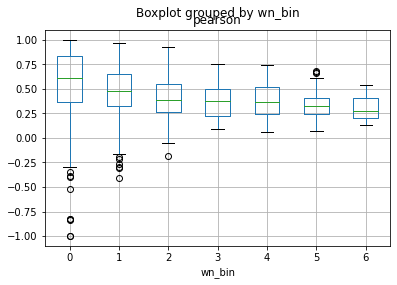


****************************************
*** Evaluating results/semcor_analysis_model.ffnn.mc_rae_real.1k.50epochs.0.5dropout.lr1e-4.hsize300.csv model ***
****************************************


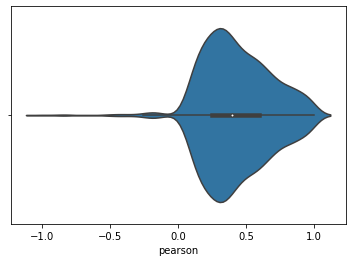

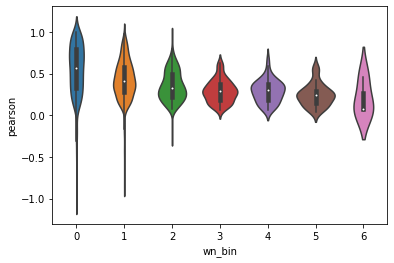

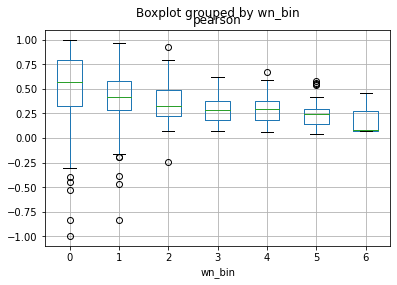


****************************************
*** Evaluating results/semcor_analysis_model.ffnn.mc_rae_real.5k.50epochs.0.5dropout.lr1e-4.hsize300.csv model ***
****************************************


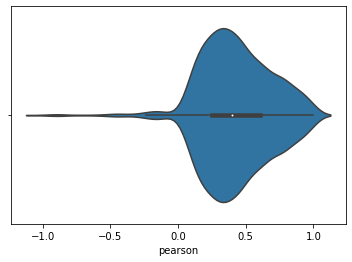

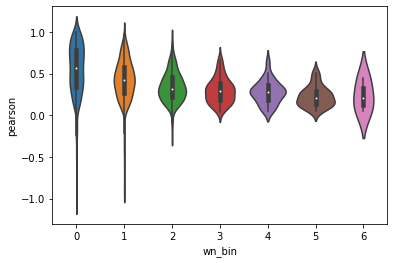

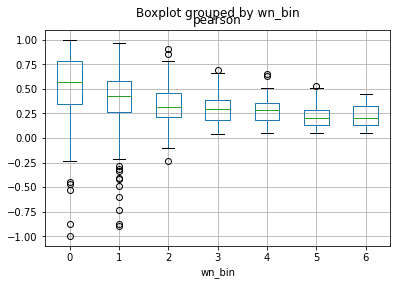


****************************************
*** Evaluating results/semcor_analysis_model.modabs.mc_rae_real.1k.csv model ***
****************************************


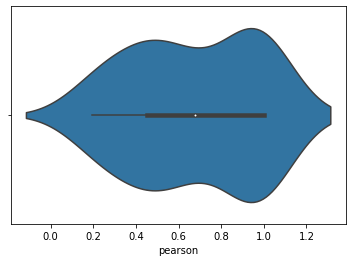

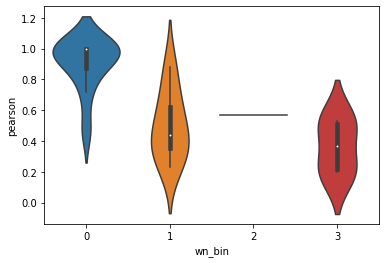

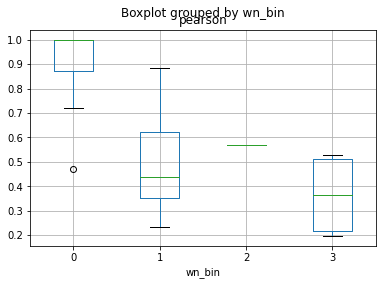


****************************************
*** Evaluating results/semcor_analysis_model.modabs.mc_rae_real.5k.csv model ***
****************************************


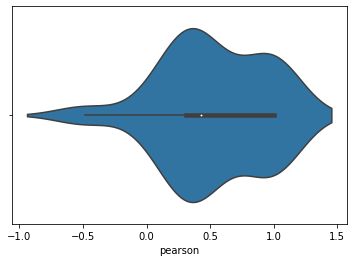

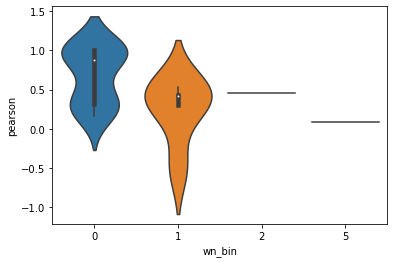

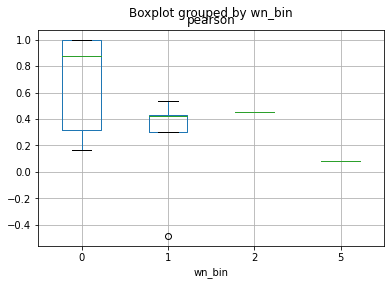

In [13]:
for save_path in models:
    df = pd.read_csv("../" + save_path)
    print("****************************************")
    print("*** Evaluating %s model ***" % save_path)
    print("****************************************")    
    analyze_data(df)
    print("")


In [14]:

print("****************************************")
print("*** Evaluating Average Correlation ***")
print("****************************************")  
for save_path in models:
    df = pd.read_csv("../" + save_path)
    print(save_path, average_correlation(df))


****************************************
*** Evaluating Average Correlation ***
****************************************
results/semcor_analysis_model.plsr.mc_rae_real.1k.50components.500max_iters.csv 0.47088241245452145
results/semcor_analysis_model.plsr.mc_rae_real.5k.100components.500max_iters.csv 0.48263569873615925
results/semcor_analysis_model.ffnn.mc_rae_real.1k.50epochs.0.5dropout.lr1e-4.hsize300.csv 0.4296519635972567
results/semcor_analysis_model.ffnn.mc_rae_real.5k.50epochs.0.5dropout.lr1e-4.hsize300.csv 0.42454648697655367
results/semcor_analysis_model.modabs.mc_rae_real.1k.csv 0.6720456606727034
results/semcor_analysis_model.modabs.mc_rae_real.5k.csv 0.5229930562049416
